In [24]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
breast_cancer_dataset = datasets.load_breast_cancer()

print(breast_cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
breast_cancer_dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
breast_cancer_dataset.data.shape

(569, 30)

In [10]:
breast_cancer_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
df_features = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
df_target = pd.DataFrame(breast_cancer_dataset.target, columns=["cancer"])
df = pd.concat([df_features, df_target], axis=1)

In [12]:
x = breast_cancer_dataset.data
y = breast_cancer_dataset.target

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=3)
KNN_clf.fit(x_train,y_train)
print("Model trained successfully")

Model trained successfully


In [17]:
y_pred = KNN_clf.predict(x_test)

In [18]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print("Model Accuracy for K= 3 : ", acc*100)

Model Accuracy for K= 3 :  94.73684210526315


In [20]:
accuracy = []
for k in range(1,30,2):
    KNN_clf = KNeighborsClassifier(n_neighbors = k)
    KNN_clf.fit(x_train,y_train)
    y_pred = KNN_clf.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)


In [21]:
print(accuracy)

[0.9649122807017544, 0.9473684210526315, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859]


Text(0, 0.5, 'Accuracy')

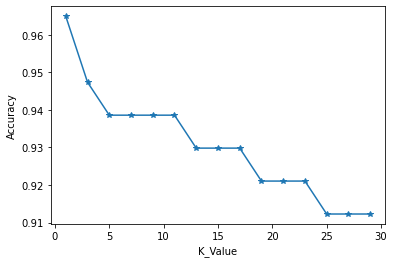

In [25]:
plt.plot(range(1,30,2),accuracy,'*-')
plt.xlabel("K_Value")
plt.ylabel("Accuracy")

In [26]:
KNN_clf = KNeighborsClassifier(n_neighbors=3)
KNN_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = KNN_clf.predict(x_test)
predictions = y_pred
print(accuracy_score(y_test, predictions))

0.9473684210526315


In [29]:
print(confusion_matrix(y_test, predictions))

[[36  2]
 [ 4 72]]


In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.97      0.95      0.96        76

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

